# Road User Classification
#### by Kuanchieh Peng

## Problem Statement
> Build a best feasible model that classifies road users. The top priority is maximizing classification accuracy on unseen data.

## Imports

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
#from scipy.spatial import ConvexHull, convex_hull_plot_2d
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('vrudata.csv')

## Pipeline

In [3]:
class bold:
    start = '\033[1m'
    end   = '\033[0m'

def info(df):
    # Prints typically useful statistical information about given dataframe.
    
    print("This dataframe consists of ", df.shape[1], " columns and", df.shape[0], " rows.")
    print("This dataframe consists of ", df.isnull().sum().sum(), " null entires.")
    print("This dataframe consists of ", df[df.duplicated()].shape[0], " duplicate rows.")
    print(df[df['target'] == 1].shape[0], " rows belong to class target = 1.")
    print(df[df['target'] == 0].shape[0], " rows belong to class target = 0.")
    print("")
    print(bold.start, "Notable statistics of numeric features in this dataset:", bold.end)
    print("")
    print(df.describe())
    print("")
    print(bold.start, "Object type of features in this dataset:", bold.end)
    print("")
    df.info()

## EDA

In [4]:
df.head(3)

,acc_x,acc_y,acc_z,target
0,-0.113725,0.083797,9.654618,not car
1,-0.098162,0.087388,9.630676,not car
2,-0.099359,0.094571,9.645041,not car


- Our target variable is categorical, therefore I shall encode it. Since there is no ordinality within our target variable, apply one hot encoding instead of integer encoding.

In [5]:
df['target'] = pd.get_dummies(df.target, drop_first = False)
df.head(3)

,acc_x,acc_y,acc_z,target
0,-0.113725,0.083797,9.654618,0
1,-0.098162,0.087388,9.630676,0
2,-0.099359,0.094571,9.645041,0


In [6]:
info(df)

This dataframe consists of  4  columns and 120000  rows.
This dataframe consists of  0  null entires.
This dataframe consists of  8186  duplicate rows.
60000  rows belong to class target = 1.
60000  rows belong to class target = 0.

 Notable statistics of numeric features in this dataset: 

               acc_x          acc_y          acc_z         target
count  120000.000000  120000.000000  120000.000000  120000.000000
mean       -0.354549       5.367115       6.729311       0.500000
std         1.931744       3.420114       2.588606       0.500002
min       -12.509735     -19.051361     -19.093689       0.000000
25%        -1.116619       1.902695       4.829160       0.000000
50%        -0.529119       6.922834       6.459327       0.500000
75%        -0.092177       8.182184       9.212952       1.000000
max        36.782090      13.737244      60.973206       1.000000

 Object type of features in this dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 t

From the above, I know that the data is perfectly class-balanced. NICE. \
If there happens to be an independent variable with at least 20 percent of its values being null, I will drop it.

There are quite a few duplicate values in all three independent variables. However, it is logical since road users on the same road are likely travelling at same or similar speeds at all times within some time span. Therefore, I will leave them as is.

I checked whether our independent variables are in the desired data type, float, instead of string or other types. Fortunately they are. If not the case, apply the below.

## Visualization

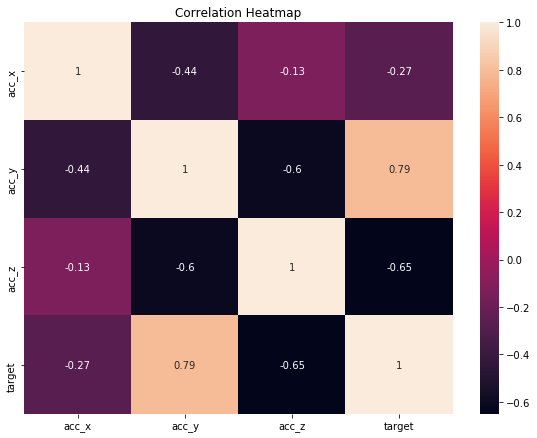

In [7]:
plt.figure(figsize = (9.6, 7.2))
sns.heatmap(df.corr(), xticklabels = df.corr().columns, yticklabels = df.corr().columns, annot = True)
plt.title("Correlation Heatmap")
plt.show()

There is little to none multicollinearity in our data.

acc_y highly correlated to target variables. possible reason: car travelling at higher speeds prior to hitting brakes compared to pedestrains or bikers.

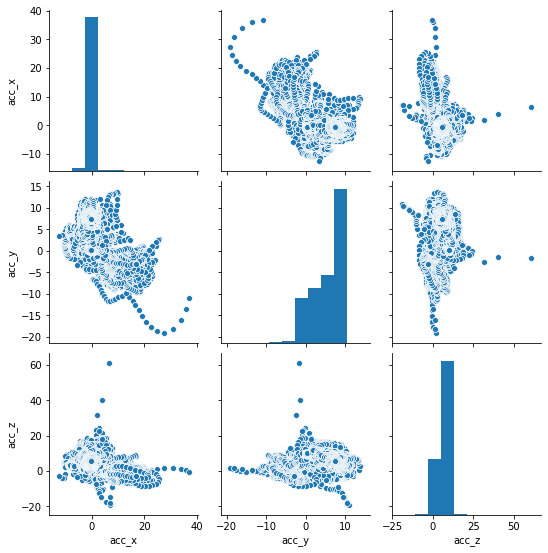

In [8]:
sns.pairplot(df.drop(['target'], axis = 1))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
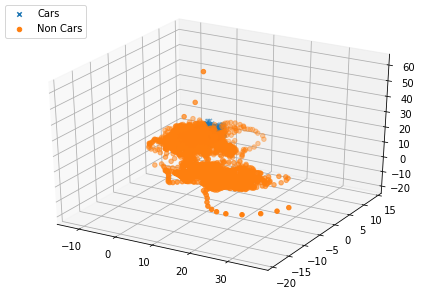

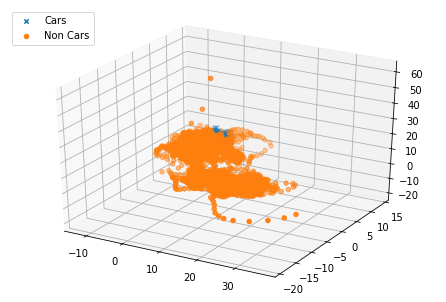

In [23]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
# ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
df_target1 = df[df.target == 1]
df_target0 = df[df.target == 0]

ax.scatter(df_target1['acc_x'], df_target1['acc_y'], df_target1['acc_z'], marker = 'x', label = 'Cars')
ax.scatter(df_target0['acc_x'], df_target0['acc_y'], df_target0['acc_z'], marker = 'o', label = 'Non Cars')
plt.legend(loc = 'upper left')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
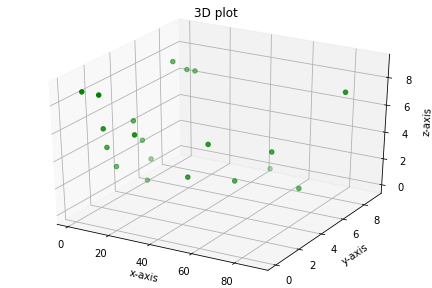

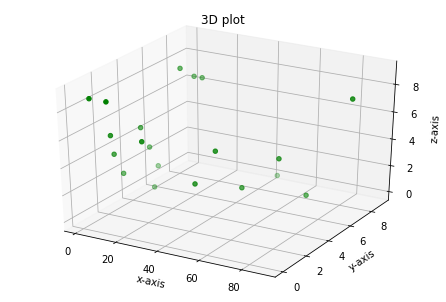

In [25]:
# creating 3d plot using matplotlib
# in python

# for creating a responsive plot
%matplotlib widget

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# creating random dataset
xs = [14, 24, 43, 47, 54, 66, 74, 89, 12,
	44, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]

ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,
	5, 2, 4, 1, 8, 7, 0, 5]

zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2,
	3, 4, 5, 6, 7, 8, 9, 0]

# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()

In [ ]:
X = df[{'acc_x', 'acc_y', 'acc_z'}]
y = df['target']
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear', C = 10000))
clf.fit(X, y)

## Classification

In this task I'm trying to predict categories. I have labeled data, and a total of 120k counts of data.

Since I'm trying to predict categories and have labeled data, consider training classifiers. Since we have 120k rows of data, which is a considerably large amount, consider using stochastic gradient descent to optimize our classifier.